## MSDS 432 - Programming Assignment #6 Dan Avni

## Executive Summary

The purpose of this programming assignment is to provide a "real-world" demonstration of the runtime performance of the breadth-first-search (BFS) algorithm. BFS is a long-standing key algorithm in the study of graph and tree search and traversal, with applications ranging from network community detection to shortest distance search. 

BFS search strategy is to traverse the tree or graph level by level, by queuing nodes in a first-in-first-out data structure.  

BFS worst-case runtime performance in the $Big O$ notation is $O(|V| + |E|)$ with $|V|$ representing the number of vertices in the graph and $|E|$ representing the number of edges. 

We demonstrate that BFS runtime performance increases the deeper the searched item resides in the tree. Hence, for use cases where the deeper nested items are commonly searched, an alternative method such as depth-first-search (DFS) should be considered.


## Method and Conclusions

To demonstrate the BFS performance relative to the tree depth we constructed a five-level deep tree. The first level has five nodes, each connected to five child nodes. Each consecutive level continues this structure. The resulting tree spans 3905 nodes in total, with each level respectively including 5, 25, 125, 625, 3125 nodes.

We used the following naming convention when naming the nodes:

{Level N}{Parent N}{Leven N+1}{Child N}.

Thus, a sample node on the third level could be named: 122135, indicating the entire node's lineage: 12 -> 1221 -> 122135.

The below image depicts the first three levels of our graph with the BFS traversal order as overlay:

<img src="./tree.png" width="75%" height="75%">

We conduct a BFS search against each level, performing as many searches as the level depth.

The below chart shows the mean BFS results, clearly illustrating the performance degradation corresponding to a deeper level search.

<img src="./runtime5.png">

## Implementation

In [16]:
#import required packages
from collections import deque
import pandas as pd
import time
import matplotlib.pyplot as plt

In [17]:
#breadth-first-search (bfs) implementation adapted and heavily modified from: 
#https://github.com/egonSchiele/grokking_algorithms/

def breadth_first_search(tree, item):
    search_queue = deque(['__root__'])
    # This set is how you keep track of which items you've searched before.
    searched = set()
    while search_queue:
        cur_item = search_queue.popleft()
        # Only search this item if you haven't already searched them.
        if cur_item not in searched:
            if cur_item == item:
                return True
            else:
                for child in tree[cur_item]:
                    search_queue.append(child)
                # Marks this item as searched
                searched.add(cur_item)
    return False

In [18]:
#unit test
tree = {}
tree['__root__'] = ["danny"]
tree["danny"] = ["alice", "bob", "claire"]
tree["bob"] = ["anuj", "peggy"]
tree["alice"] = ["peggy"]
tree["claire"] = ["thom", "jonny"]
tree["anuj"] = []
tree["peggy"] = []
tree["thom"] = []
tree["jonny"] = []

breadth_first_search(tree, "peggy")

True

In [19]:
#prepare data using a recursive function stopping at the fifth level
def add_tree_children(tree, item, count, level):
    if level == 5:
        tree[item] = []
        return
    
    tree[item] = []
    
    for child in range(1, count+1):
        child_item = '{}{}{}'.format(item if item != "__root__" else "", level+1, child)
        tree[item].append(child_item)
        add_tree_children(tree, child_item, count, level+1)

tree = {}

add_tree_children(tree, '__root__', 5, 0)

In [20]:
search_levels = [1, 2, 3, 4, 5]

test_results_col_names = ['search_level', 'search_item', 'search_ms']
test_results           = pd.DataFrame(columns = test_results_col_names) 

search_prefix = ['1{}', '112{}', '11213{}', '1121314{}','112131415{}']

for level in range(1,6):
    for count in range(1,level+1):
            search_item = search_prefix[level-1].format(count)
            start   = time.time()
            found = breadth_first_search(tree, search_item)
            if found == False:
                raise Exception("item not found")
            search_ms = (time.time() - start) * 1000
            #insert the results into a new dataframe record 
            test_results.loc[len(test_results)] = [level, search_item, search_ms]

In [21]:
test_results

,search_level,search_item,search_ms
0,1,11,0.008106
1,2,1121,0.021935
2,2,1122,0.019073
3,3,112131,0.041246
4,3,112132,0.087023
5,3,112133,0.074863
6,4,11213141,0.475883
7,4,11213142,0.199795
8,4,11213143,0.173092
9,4,11213144,0.166893


In [22]:
test_results_mean = test_results.groupby(['search_level'], as_index=False)['search_ms'].mean()

Below is a tabular representation of the test data showing the increase in mean search time as the deeper levels are searched.

In [23]:
test_results_mean

,search_level,search_ms
0,1,0.008106
1,2,0.020504
2,3,0.067711
3,4,0.253916
4,5,0.675058


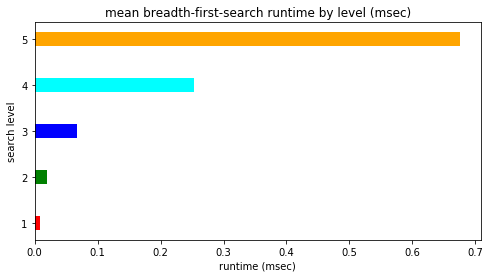

In [24]:
#prdoduce a bar plot of the mean search time by level
plt.figure(figsize=(8,4))
plt.barh(test_results_mean.search_level, test_results_mean.search_ms, height=0.3, 
         color=['red', 'green', 'blue', 'cyan','orange'])
plt.ylabel('search level')
plt.xlabel('runtime (msec)')
plt.title('mean breadth-first-search runtime by level (msec)')
plt.show()

## Extra work 

We traverse the tree to demonstrate the search order and visualize the results using the pydotplus package and GraphViz, a graph visualization package using the DOT langauge to construct graphs and tree.

We use a 3-level tree to produce a human-friendly plot.

In [25]:
import pydotplus as pdp
from IPython.display import Image 

In [26]:
#prepare data
def add_tree_children(tree, item, count, level):
    if level == 2:
        tree[item] = []
        return
    
    tree[item] = []
    
    for child in range(1, count+1):
        child_item = '{}{}{}'.format(item if item != "__root__" else "", level+1, child)
        tree[item].append(child_item)
        add_tree_children(tree, child_item, count, level+1)

tree = {}

add_tree_children(tree, '__root__', 3, 0)

In [27]:
def breadth_first_traverse(tree):
    step = 0
    search_queue = deque(['__root__'])
    # This set is how you keep track of which items you've searched before.
    searched = set()
    output   = ""
    while search_queue:
        cur_item = search_queue.popleft()
        # Only search this item if you haven't already searched them.
        if cur_item not in searched:
            output += \
            "{} [label=\"{}\", xlabel=\"{}\"];".format(cur_item, cur_item, step)
            for child in tree[cur_item]:
                output += "{}->{};".format(cur_item, child)
                search_queue.append(child)
            # Marks this item as searched
            step += 1
            searched.add(cur_item)
    return "digraph { " + output + "}";

In [28]:
tree_as_dot = breadth_first_traverse(tree)

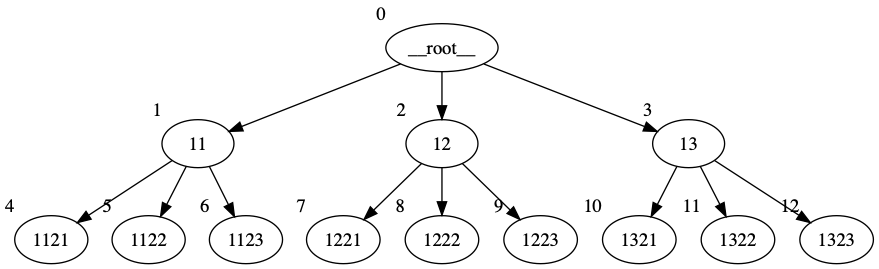

In [29]:
graph = pdp.graph_from_dot_data(tree_as_dot)
 
Image(graph.create_png())